Import required libraries.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files, drive
import cv2, glob, re, io, zipfile
from os import listdir
from keras.models import Model, load_model
from tensorflow import keras
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [63]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Extracting input sample file

In [64]:
filename = "/content/drive/MyDrive/sample.zip"
with zipfile.ZipFile(filename, 'r') as zipp:
  zipp.extractall()
  zipp.close()

In [65]:
items = glob.glob('/content/sample/*')

aaa = []
for each_image in items:
  # if each_image.endswith(".jpg") or each_image.endswith(".jpeg"):
    image = cv2.imread(each_image)
    image = cv2.resize(image, (96,96))
    aaa.append(image)


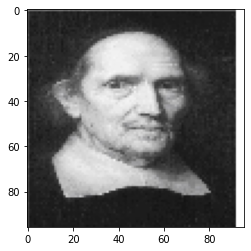

In [66]:
image = cv2.cvtColor(aaa[0], cv2.COLOR_BGR2RGB) 
plt.imshow(image)

In [67]:
dir_struct = '/content/sample/'
file_list = listdir(dir_struct) # it will return all the image file names as a list

Extracting trained models.

In [68]:
filename = "/content/drive/MyDrive/model.zip"
with zipfile.ZipFile(filename, 'r') as zipp:
  zipp.extractall()
  zipp.close()

In [69]:
df = pd.DataFrame({'image_name': file_list}, columns=['image_name'])

In [70]:
image_list = [] # this list will hold all the images
#for i in range(1):
for i in range(df.shape[0]): # read the image one by one
    image = cv2.imread(dir_struct+df.iloc[i]['image_name'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR to RGB convert
    image = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA) # resizing all images to 32x32: NOT ideal but need to be uniform in order to apply the algorithm
                                                                                                                        # this actually ensures all the features [pixel values] will be of same size
    image_list.append(image) # appending the read image to a list

In [71]:
df.shape

(12, 1)

In [72]:
test_images = np.array(image_list)

Model 1 - Wrinkles

In [73]:
filepath = "/content/model/Model_1-05-0.8170.h5"
model_1 = load_model(filepath)

y_pred1 = model_1.predict(test_images)
model_1_label = np.argmax(y_pred1, axis=1)
print(y_pred1)
print(model_1_label)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0 0 0 0 0 0 0 0 0 0 0 0]


Model 2 - Freakles

In [74]:
filepath = "/content/model/Model_2-05-0.9774.h5"
model_2 = load_model(filepath)

y_pred2 = model_2.predict(test_images)
model_2_label = np.argmax(y_pred2, axis=1)
print(y_pred2)
print(model_2_label)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0 0 0 0 0 0 0 0 0 0 0 0]


Model 3 - Glasses

In [75]:
filepath = "/content/model/Model_3-05-0.9048.h5"
model_3 = load_model(filepath)

y_pred3 = model_3.predict(test_images)
model_3_label = np.argmax(y_pred3, axis=1)
print(y_pred3)
print(model_3_label)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0 0 0 0 0 0 0 0 0 0 0 0]


Model 4 - Hair color

In [76]:
filepath = "/content/model/Model_4-05-0.4010.h5"
model_4 = load_model(filepath)

y_pred4 = model_4.predict(test_images)
model_4_label = np.argmax(y_pred4, axis=1)
print(y_pred4)
print(model_4_label)

[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.4389330e-37 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 

Model 5 - Hair top

In [77]:
filepath = "/content/model/Model_5-05-0.7444.h5"
model_5 = load_model(filepath)

y_pred5 = model_5.predict(test_images)
model_5_label = np.argmax(y_pred5, axis=1)
print(y_pred5)
print(model_5_label)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[2 2 2 2 2 2 2 2 2 2 2 2]


In [78]:
df['wrinkles'] = model_1_label
df['freakles'] = model_2_label
df['glasses'] = model_3_label
df['hair_color'] = model_4_label
df['hair_top'] = model_5_label

In [79]:
df

,image_name,wrinkles,freakles,glasses,hair_color,hair_top
0,1133.jpg,0,0,0,1,2
1,619.jpg,0,0,0,1,2
2,113.jpg,0,0,0,1,2
3,790.jpg,0,0,0,1,2
4,741.jpg,0,0,0,1,2
5,203.jpg,0,0,0,1,2
6,83.jpg,0,0,0,1,2
7,824.jpg,0,0,0,1,2
8,665.jpg,0,0,0,1,2
9,320.jpg,0,0,0,1,2


Saving output as csv

In [80]:
df.to_csv('/content/prediction_output.csv', index=False)